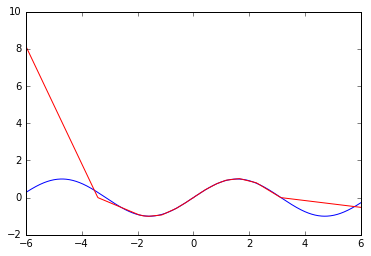

In [23]:
import tensorflow as tf
import numpy as np
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

def get_batch(n):
    x = np.random.randｎ(n)
    y = np.sin(x)
    return x,y

def leaky_relu(x,alpha=0.2):
    return tf.maximum(alpha*x,x)

sess = tf.InteractiveSession() # sess=tf.InteractiveSession()    (not ipython)

x_ = tf.placeholder(tf.float32, shape=[None, 1])
t_ = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([1,16]))
b1  = tf.Variable(tf.zeros([16]))

W2 =  tf.Variable(tf.random_normal([16,32]))
b2  = tf.Variable(tf.zeros([32]))

W3 =  tf.Variable(tf.random_normal([32,1]))
b3  =  tf.Variable(tf.zeros([1]))

sess.run(tf.initialize_all_variables())

h1 = leaky_relu(tf.matmul(x_,W1)+b1)
h2 = leaky_relu(tf.matmul(h1,W2)+b2)
y   = leaky_relu(tf.matmul(h2,W3)+b3)
e   =tf.nn.l2_loss(y-t_)

train_step = tf.train.AdamOptimizer().minimize(e)

losses =[]
sess.run(tf.initialize_all_variables())

batch_size=100
for i in range(20000):
    x,t = get_batch(batch_size)

    x = x.astype(np.float32).reshape(batch_size,1)
    t = t.astype(np.float32).reshape(batch_size,1)
    loss= e.eval(feed_dict={x_: x, t_:t})
    losses.append(loss)
    train_step.run(feed_dict={x_: x, t_:t})
    if i%100==99:
        plt.hold(False)
        x=np.linspace(-6,6,600)
        plt.plot(x,np.sin(x))
        plt.hold(True)
        p=y.eval(feed_dict={x_: (x.astype(np.float32).reshape(600,1))})
        _=plt.plot(x, p,"r")
        display.clear_output(wait=True)
        display.display(plt.gcf()) 

        
display.clear_output(wait=True)



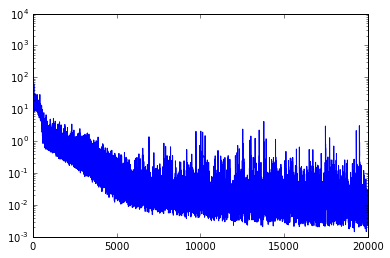

In [24]:
plt.plot(losses,"b")
plt.yscale('log')

